# Building  A Table Extractor From PDF Using Python

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
!pip3 install tabula-py --quiet

In [12]:
import tabula

In [90]:
df = tabula.read_pdf(file, pages="all")

Got stderr: Oct 04, 2021 7:48:32 PM org.apache.pdfbox.pdmodel.graphics.color.PDICCBased ensureDisplayProfile



In [16]:
len(df)

7

In [28]:
type(df[5])

pandas.core.frame.DataFrame

In [96]:
for n in df:
    print(n.shape)

(2, 2)
(3, 4)
(14, 4)
(13, 4)
(1, 4)
(12, 4)
(0, 1)


In [97]:
new = df[3]

In [98]:
new.head(5)

,Human Development Indicators,2000,2011,Unnamed: 0
0,13.0,Human Development Index Value (HDI),0.461,0.547
1,14.0,HDI Rank (out of 187),NaN,134.000
2,15.0,Inequality Adjusted Human Development Index Value,NaN,0.392
3,16.0,Loss in HDI due to Inequalities (%),NaN,28.700
4,NaN,NaN,2001.000,2011.000


In [101]:
df = new.iloc[10:,1:]

In [102]:
df = df.reset_index(drop=True)
df.columns = ['KPI', '2001', '2011']

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KPI     3 non-null      object 
 1   2001    3 non-null      float64
 2   2011    3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


In [104]:
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [105]:
df.to_csv('df.csv', index=False)

In [106]:
df_melt = df.melt('KPI', var_name ='Year', value_name='Percentage')

In [108]:
df_melt

,KPI,Year,Percentage
0,Literacy Rate (%),2001,64.80
1,Male Literacy Rate (%),2001,75.30
2,Female Literacy Rate (%),2001,53.70
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

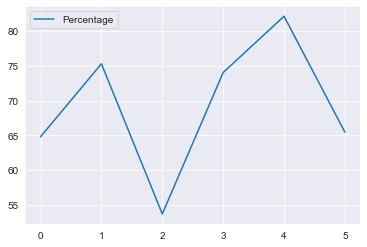

In [125]:
sns.lineplot(data=df_melt);

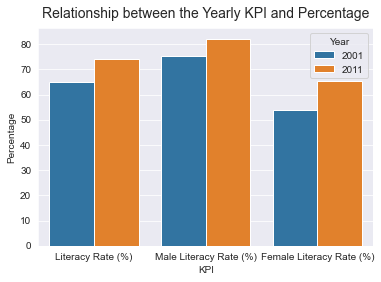

In [124]:
sns.set_style('darkgrid')
plt.title('Relationship between the Yearly KPI and Percentage', 
          fontsize=14, y=1.02)
sns.barplot(x='KPI', y='Percentage', hue='Year', data=df_melt);